In [1]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
%matplotlib inline

In [2]:
def f0_sol_eqq_eqpi(p,q,l):
    # coefs second degree polynomial: ax**2 + bx + c = 0
    r = 1/q
    a = -l
    b = 2*p*(1-l)+l+r
    c = -r
    # folution to f0:
    root = np.sqrt(b**2-4*a*c)
    # print(a, b, c, root)
    f0_1 = (-b+root)/(2*a)
    f0_2 = (-b-root)/(2*a)
    return f0_1, f0_2
    # return root, root

def f0_sol_eqq_eqpi_stab(p,q,l):
    r = 1/q
    inRoot = (l-r)**2 + 4*p*(1-l)*(l+r+(1-l)*p)
    return (-np.sqrt(inRoot), np.sqrt(inRoot))

In [14]:
# pi = 1e-10
pi = 0.0
q = 10
l = 0.05
print(f0_sol_eqq_eqpi(pi,q,l))


-0.05 0.15000000000000002 -0.1 0.050000000000000024
(1.0, 2.0000000000000004)


In [3]:
# solution obtained making the epsilon approximation:
def f0_aprox1(p,q,l):
    r = 1/q
    return 1 + 2*(1-l)*p/(l-r)

def f0_aprox1_stab(p,q,l):
    r = 1/q
    try:
        func = l-r+2*p*(1-l)*(l+r)/(l-r)
    except ZeroDivisionError:
        print(f'Divide by 0 encountered when p, q, l: {p}, {q}, {l}')
        func = 0.0
    return func

def f0_aproxrl(p,q,l):
    r = 1/q
    return r/l*(1-2*(1-l)*p/(l-r))

def f0_aproxrl_stab(p,q,l):
    r = 1/q
    func = -(l-r+2*p*(1-l)*(l+r)/(l-r))
    return func


# solution with epsilon to higher order (no se si matematicament esta be)
# I do y = 4*eps*(...+ eps) and do taylor to second order of y

def f0_aprox2_rl(p,q,l): # (+)
    r = 1/q
    eps = p*(1-l)
    eps1_coef = (1/l) * (1 - (l+r)/(l-r))
    eps2_coef = (1/l) * (-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = (1/l) * (l+r)/(l-r)
    eps4_coef = (l-r)/l
    return r/l + eps1_coef*eps + eps2_coef*eps**2 + eps3_coef*eps**3 + eps4_coef*eps**4

def f0_aprox2_rl_stab(p,q,l):
    r = 1/q
    eps = p*(1-l)
    eps1_coef = -2*(l+r)/(l-r)
    eps2_coef = 2*(-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = 4*(l+r)/(l-r)
    eps4_coef = 2*(l-r)
    return r-l + eps1_coef*eps + eps2_coef*eps**2 + eps3_coef*eps**3 + eps4_coef*eps**4

def f0_aprox2_1(p,q,l): # (-)
    r = 1/q
    eps = p*(1-l)
    eps1_coef = (1/l) * (1 + (l+r)/(l-r))
    eps2_coef = (1/l) * (-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = (1/l) * (l+r)/(l-r)
    eps4_coef = (l-r)/l
    return 1 + eps1_coef*eps - eps2_coef*eps**2 - eps3_coef*eps**3 - eps4_coef*eps**4

def f0_aprox2_1_stab(p,q,l):
    r = 1/q
    eps = p*(1-l)
    eps1_coef = 2*(l+r)/(l-r)
    eps2_coef = 2*(-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = 4*(l+r)/(l-r)
    eps4_coef = 2*(l-r)
    return l-r + eps1_coef*eps - eps2_coef*eps**2 - eps3_coef*eps**3 - eps4_coef*eps**4

In [11]:
pi, q, l = 0.0, 10, 0.05
print(f0_aprox1(pi,q,l), f0_aprox1_stab(pi,q,l))
print(f0_aproxrl(pi,q,l), f0_aproxrl_stab(pi,q,l))

1.0 -0.05
2.0 0.05


#### The approx solution f0=1 coincides with the complete solution when pi->0 !

##### For small lambda, lambda < r:

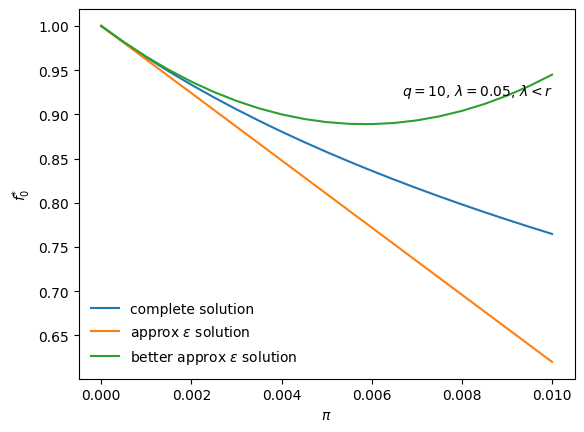

In [13]:
q, l = 10, 0.05
pi = np.linspace(0.0, 0.01, 21)
# pi = np.logspace(-3, -2, 30)

f0_full = []
f0_approx = []
f0_approx2 = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aprox1(p,q,l))
    f0_approx2.append(f0_aprox2_1(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.plot(pi, f0_approx2, label=r'better approx $\varepsilon$ solution')
# ax.set_xscale('symlog')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda < r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

##### ... and for lambda > r:

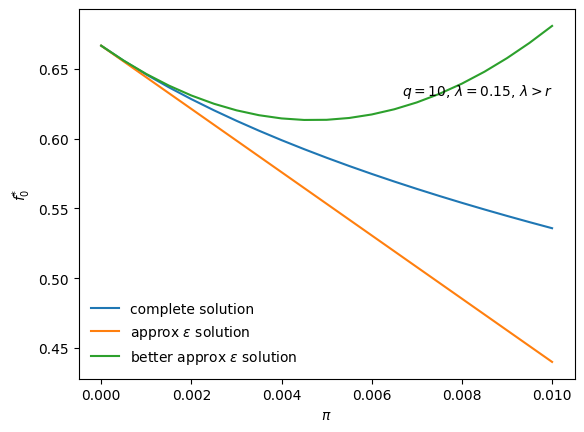

In [14]:
q, l = 10, 0.15
pi = np.linspace(0.0, 0.01, 21)

f0_full = []
f0_approx = []
f0_approx2 = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aproxrl(p,q,l))
    f0_approx2.append(f0_aprox2_rl(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.plot(pi, f0_approx2, label=r'better approx $\varepsilon$ solution')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

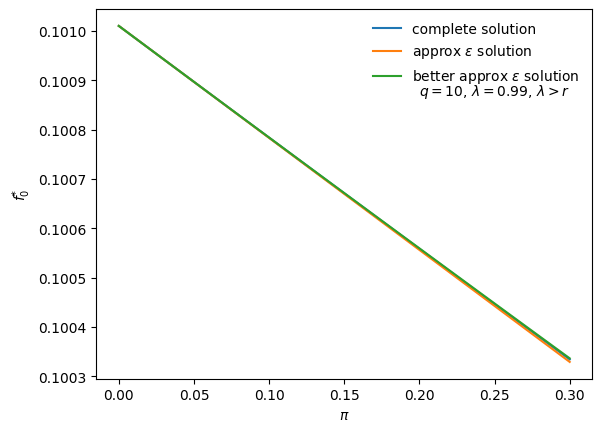

In [4]:
q, l = 10, 0.99
pi = np.linspace(0.0, 0.3, 21)

f0_full = []
f0_approx = []
f0_approx2 = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aproxrl(p,q,l))
    f0_approx2.append(f0_aprox2_rl(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.plot(pi, f0_approx2, label=r'better approx $\varepsilon$ solution')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

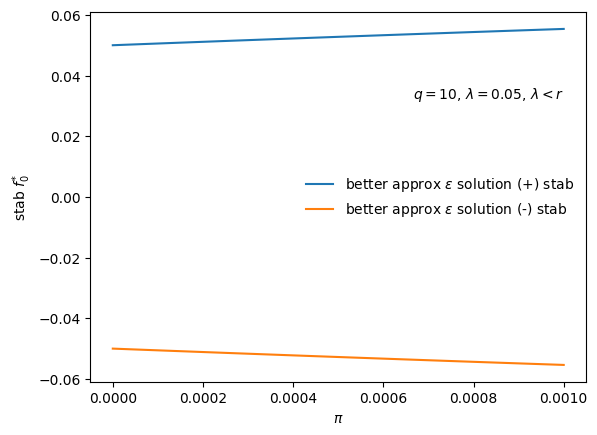

In [38]:
q, l = 10, 0.05
pi = np.linspace(0.0, 0.001, 21)

f0_approx2_rl_stab = []
f0_approx2_1_stab = []

for p in pi:
    f0_approx2_rl_stab.append(f0_aprox2_rl_stab(p,q,l))
    f0_approx2_1_stab.append(f0_aprox2_1_stab(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_approx2_rl_stab, label=r'better approx $\varepsilon$ solution (+) stab')
ax.plot(pi, f0_approx2_1_stab, label=r'better approx $\varepsilon$ solution (-) stab')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'stab $f_0^{*}$')

if l>1/q:
    fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
else:
    fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda < r$')
ax.legend(frameon=False)
# fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

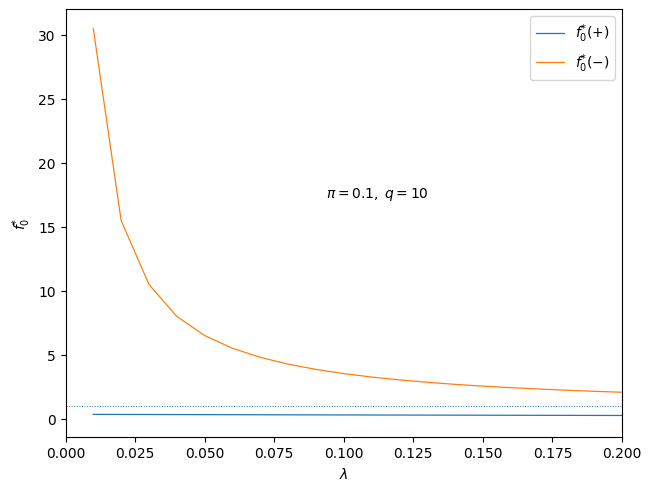

In [99]:
p,q = 1e-1, 10

ls = np.linspace(0,1,101)
f0s_plus, f0s_minus = [], []

ls = ls[1:]
for l in ls:
    f0s = f0_sol_eqq_eqpi(p,q,l)
    f0s_plus.append(f0s[0]), f0s_minus.append(f0s[1])

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(ls, f0s_plus, label='$f_0^{*}(+)$', lw=0.9)
ax.plot(ls, f0s_minus, label='$f_0^{*}(-)$', lw=0.9)
ax.axhline(1, 0, 1, lw=0.7, ls=':')
ax.legend()
ax.set(xlabel='$\lambda$', ylabel='$f_0^{*}$', xlim=(0, 0.2))
fig.text(0.5, 0.6, f'$\pi = {p}, \; q = {q}$')
fig.savefig(f'complete_solutions_small_pi_{p}_q_{q}.png')

## q2 = q1 + delta

In [32]:
def f0_sol_pi0_qdelta(q,delta,l):
    r = 1/q
    root = 1 + r**2*delta/(l-r)
    print(root)
    f0plus = 1/(2*l) * (l+r-r**2*delta/2 + (l-r)*np.sqrt(root))
    f0minus = 1/(2*l) * (l+r-r**2*delta/2 - (l-r)*np.sqrt(root))
    return (f0plus, f0minus)

def f0_sol_pi0_qdelta_taylor(q,delta,l):
    r = 1/q
    f0plus = 1
    f0minus = r/l - r**2*delta/(2*l)
    return (f0plus, f0minus)

def f0_sol_pi0_qdelta_taylor_stab(q,delta,l):
    r = 1/q
    f0plus_stab = l - r
    f0minus_stab = r - l - r**2*delta
    return (f0plus_stab, f0minus_stab)

def f0_sol_eqpi_qdelta(pi,q,delta,l):
    r = 1/q
    A = 2*(1-l)*pi + l + r - r**2*delta/2
    R = r*(-1 + r*delta/2)
    root = np.sqrt(A**2 + 4*l*R)
    f0plus = (A + root)/(2*l)
    f0minus = (A - root)/(2*l)
    return (f0plus, f0minus)

def f0_sol_eqpi_qdelta(pi,q,delta,l):
    r = 1/q
    A = 2*(1-l)*pi + l + r - r**2*delta/2
    R = r*(-1 + r*delta/2)
    f0plus_s = A + np.sqrt(A + 4*l*R)- l - r
    f0minus_s = A - np.sqrt(A + 4*l*R)- l - r
    return (f0plus_s, f0minus_s)

In [15]:
f0_sol_eqq_eqpi(0.0, 10, 0.15)

(0.6666666666666666, 1.0000000000000002)

In [30]:
f0_sol_pi0_qdelta(10, 1e-5, 0.1)

ZeroDivisionError: float division by zero

In [31]:
f0_sol_eqpi_qdelta(0.0, 10, 1e-6, 0.1)

(0.9999999978126509, 0.999999952187349)

In [105]:
f0_sol_pi0_qdelta_taylor(10, 1e-3, 0.099991)

(1, 1.000040003600324)

In [107]:
r = 0.1
delta = 1e-3
print(r*(1-r**2*delta/2))

0.0999995


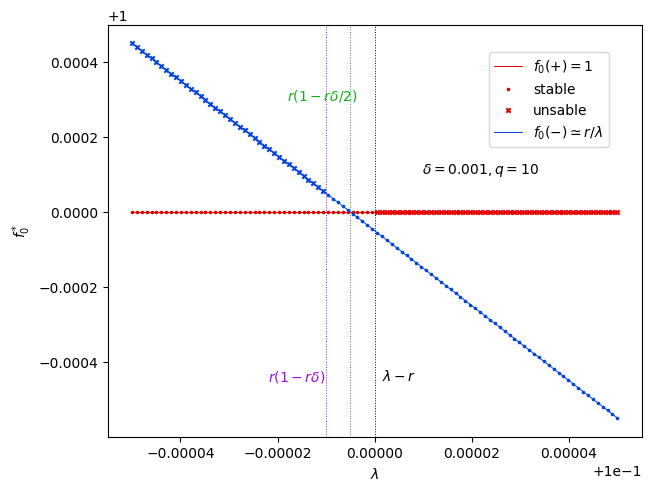

In [80]:
q = 10
delta = 1e-3
# ls = np.linspace(0.099990, 0.099999, 10)
# ls = np.linspace(0.099980, 0.099999, 21)
ls = np.linspace(0.0999, 0.1001, 100)
ls = np.linspace(0.09995, 0.10005, 100)
# ls = np.linspace(0.09995,0.100018, 100)

f0s_p, f0s_m, f0s_p_s, f0s_m_s = [], [], [], []
for l in ls:
    f0s = f0_sol_pi0_qdelta_taylor(q, delta, l)
    f0s_p.append(f0s[0]), f0s_m.append(f0s[1])
    f0s_stab = f0_sol_pi0_qdelta_taylor_stab(q, delta, l)
    f0s_p_s.append(f0s_stab[0]), f0s_m_s.append(f0s_stab[1])

# markers_p = ['.' if s<0 else 'x' for s in f0s_p_s]
# markers_m = ['.' if s<0 else 'x' for s in f0s_m_s]

f0s_p, f0s_m, f0s_p_s, f0s_m_s = np.array(f0s_p), np.array(f0s_m), np.array(f0s_p_s), np.array(f0s_m_s)
fig, ax = plt.subplots(constrained_layout=True)
ms = 10
ax.plot(ls, f0s_p, lw=0.7, color='xkcd:red', label='$f_0(+) = 1$')
ax.scatter(ls[f0s_p_s<0], f0s_p[f0s_p_s < 0], marker='.', s=ms, color='xkcd:red', label='stable')
ax.scatter(ls[f0s_p_s>0], f0s_p[f0s_p_s > 0], marker='x', s=ms, color='xkcd:red', label='unsable')

ax.plot(ls, f0s_m, lw=0.7, color='xkcd:blue', label='$f_0(-) \simeq r/\lambda$')
ax.scatter(ls[f0s_m_s<0], f0s_m[f0s_m_s < 0], marker='.', s=ms, color='xkcd:blue')
ax.scatter(ls[f0s_m_s>0], f0s_m[f0s_m_s > 0], marker='x', s=ms, color='xkcd:blue')

ax.set_xlabel('$\lambda$')
ax.set_ylabel('$f_0^*$')
# ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
fig.text(0.65, 0.65, f'$\delta = {delta}, q = {q}$')
# ax.set(xlim=(0.09998,0.100015))

r = 1/q
ax.axvline(r, 0, 1, lw=0.7, ls=':', color='k')
ax.text(0.1000015, 0.99955, '$\lambda -r$', color='xkcd:black')
ax.axvline(r*(1-delta*r), 0, 1, lw=0.7, ls=':', color='xkcd:violet')
ax.text(0.1-0.000022, 0.99955, '$r(1-r \delta)$', color='xkcd:violet')
ax.axvline(r*(1-0.5*delta*r), 0, 1, lw=0.7, ls=':', color='xkcd:green')
ax.text(0.1-0.000018, 1+0.0003, '$r(1-r \delta / 2)$', color='xkcd:green')
fig.legend(loc=(0.75, 0.7))
fig.savefig(f'f0_sol_pi0_qdelta_delta_{delta}_q_{q}.png')

### Using the complete solution in the q+delta case:

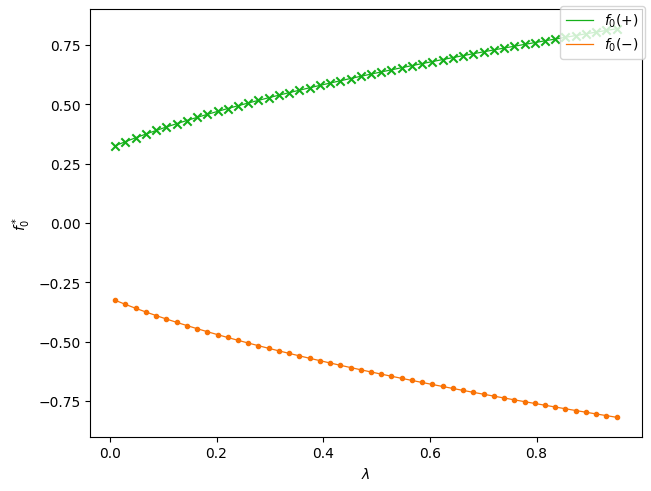

In [37]:
# q, delta = 10, 1e-6
delta = 1e-6
q = 10 - delta
pi = 0.00001
ls = np.linspace(0.01, 0.95, 50)

fig, ax = plt.subplots(constrained_layout=True)
ax.set(xlabel='$\lambda$', ylabel='$f_0^*$')

f0plus = np.array([f0_sol_eqpi_qdelta(pi,q,delta,l)[0] for l in ls])
f0minus = np.array([f0_sol_eqpi_qdelta(pi,q,delta,l)[1] for l in ls])

ax.plot(ls, f0plus, label='$f_0(+)$', lw=0.9, color='xkcd:green')
ax.plot(ls, f0minus, label='$f_0(-)$', lw=0.9, color='xkcd:orange')


# stability:
f0s_stab = f0_sol_eqpi_qdelta(pi, q, delta, l)
f0s_p_s = np.array([f0_sol_eqpi_qdelta(pi, q, delta, l)[0] for l in ls])
f0s_m_s = np.array([f0_sol_eqpi_qdelta(pi, q, delta, l)[1] for l in ls])

ax.scatter(ls[f0s_p_s<0], f0plus[f0s_p_s < 0], marker='.', color='xkcd:green')
ax.scatter(ls[f0s_p_s>0], f0plus[f0s_p_s > 0], marker='x', color='xkcd:green')

ax.scatter(ls[f0s_m_s<0], f0minus[f0s_m_s < 0], marker='.', color='xkcd:orange')
ax.scatter(ls[f0s_m_s>0], f0minus[f0s_m_s > 0], marker='x', color='xkcd:orange')


# using the third degree polynomial:
# f0s = []
# ls = np.linspace(0.05, 0.8, 16)
# for l in ls:
#     call(f'python3 f0poly_sols_clean.py {pi} {pi} {q} {q+delta} {l} > sols.dat', shell=True)
#     with open('sols.dat', 'r') as file:
#         sols = [float(f) for f in file.readline().split()]
#     f0s.append(sols[0])
# ax.plot(ls, f0s, label='3rd deg. ploy', lw=0.7, ls=':', color='k')
    
fig.legend()

# Autovalors (LSA) f0 amb la solució completa

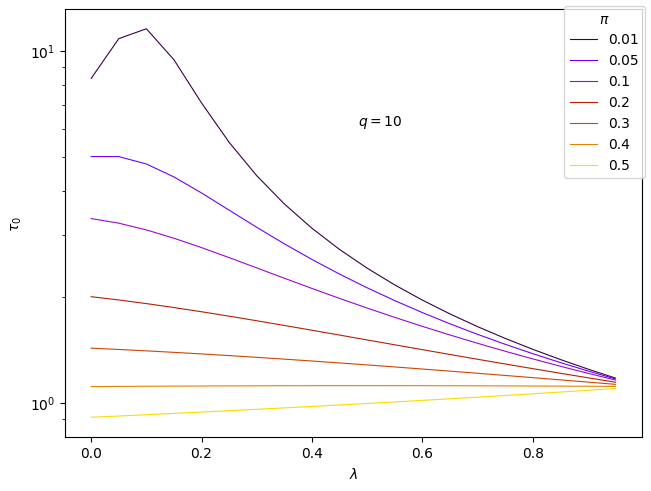

In [104]:
pi = 0.1
q = 10
ls = np.linspace(0.0, 0.95, 20)
pis = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
pis_colors = plt.cm.gnuplot(np.linspace(0.05, 0.95, len(pis)))

fig, ax = plt.subplots(constrained_layout=True)
ax.set(xlabel='$\lambda$', ylabel=r'$\tau_0$', yscale='log')
for p,c in zip(pis, pis_colors):
    autovals = [1/f0_sol_eqq_eqpi_stab(p,q,l)[1] for l in ls]
    ax.plot(ls, autovals, label=f'{p}', lw=0.8, color=c)

fig.legend(title='$\pi$')
fig.text(0.55, 0.75, f'$q = {q}$')
fig.savefig(f'char_times_eigenval_eqpi_eqq_q_{q}.png')

In [108]:
0.1*(1-1e-5)

0.099999

In [109]:
1-1e-6/2

0.9999995